# Cancer classification :
## using decision tree supervised learning algorithm:

## Importing the libraries:

In [7]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset:

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cancer.csv')

In [10]:
cancer=data.copy()

# Data Overview:

In [11]:
cancer.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [12]:
cancer.tail()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
678,0,3,1,1,1,3,2,1,1,1
679,0,2,1,1,1,2,1,1,1,1
680,1,5,10,10,3,7,3,8,10,2
681,1,4,8,6,4,3,4,10,6,1
682,1,4,8,8,5,4,5,10,4,1


#### Shape of the dataset

In [13]:
cancer.shape

(683, 10)

#### Check the datatype of each column in the

In [14]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Class        683 non-null    int64
 1   age          683 non-null    int64
 2   menopause    683 non-null    int64
 3   tumor-size   683 non-null    int64
 4   inv-nodes    683 non-null    int64
 5   node-caps    683 non-null    int64
 6   deg-malig    683 non-null    int64
 7   breast       683 non-null    int64
 8   breast-quad  683 non-null    int64
 9   irradiat     683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


## Observation :
All the columns are int.

#### Checking for missing values :

In [15]:
cancer.isnull().sum()

,0
Class,0
age,0
menopause,0
tumor-size,0
inv-nodes,0
node-caps,0
deg-malig,0
breast,0
breast-quad,0
irradiat,0


## Observations :
There is no any missing values in the dataset.

#### Check the duplicated values :


In [16]:
cancer.duplicated().sum()

234

## Observations :
There are 234 duplicated values in the dataset.

#### Drop the duplicted values :


In [17]:
cancer.drop_duplicates(inplace=True)

#### Lets check again if still have duplicated values:

In [18]:
cancer.duplicated().sum()

0

#### Now we drop all the duplicated values.

#### Statistical summaries on the dataset:

In [19]:
cancer.describe()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,0.525612,5.378619,4.222717,4.273942,3.746102,3.879733,4.806236,4.200445,3.828508,1.913140
std,0.499901,2.869029,3.251280,3.141494,3.158413,2.456544,3.880509,2.651634,3.387146,2.068909
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000
75%,1.000000,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


##Observations:
We can notice that the mean value of the age is around 5, the minimum age is 1 and the maxium 10.
The mean of the tumor size is 4.27, the minimum size is 1 and the maximum size is 10.

### Exploratory data analysis (EDA):

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [21]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Univariate analysis:

#### Observation on the classes:

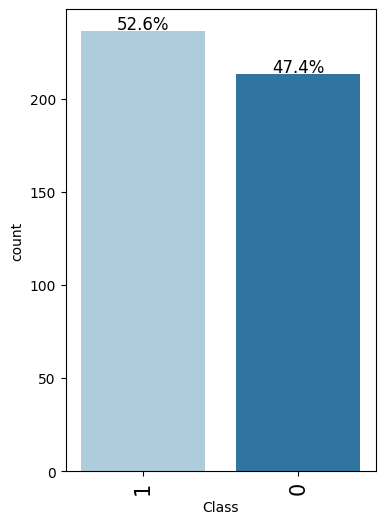

In [22]:
labeled_barplot(cancer, 'Class', perc=True)

#### We can notice that 52.6% of the data contains class 1 and 47.4% of it contains class 0.

### Observations on Age:

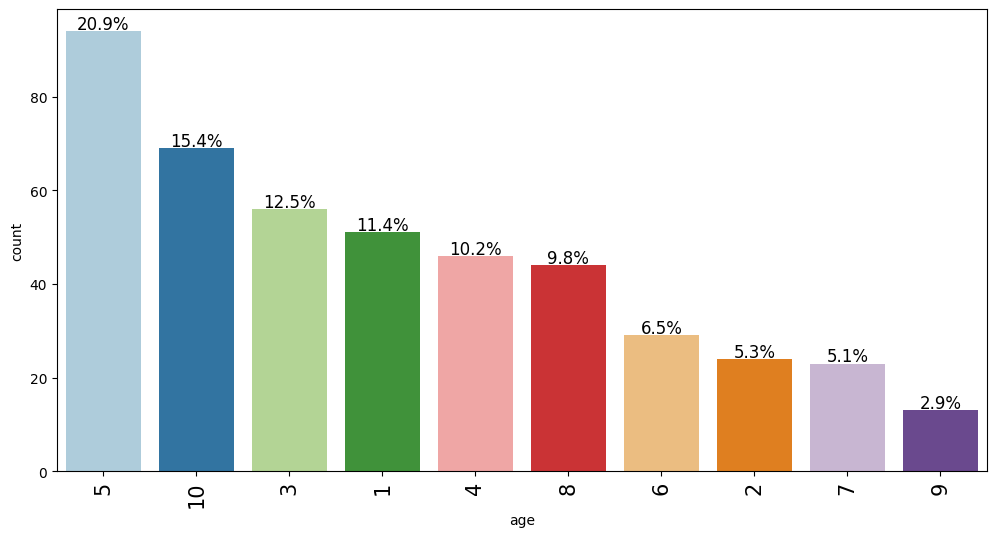

In [23]:
labeled_barplot(cancer, 'age', perc=True)

### We noticed that most of the people their age is 5, followed by 10.

### Observations on menopause:

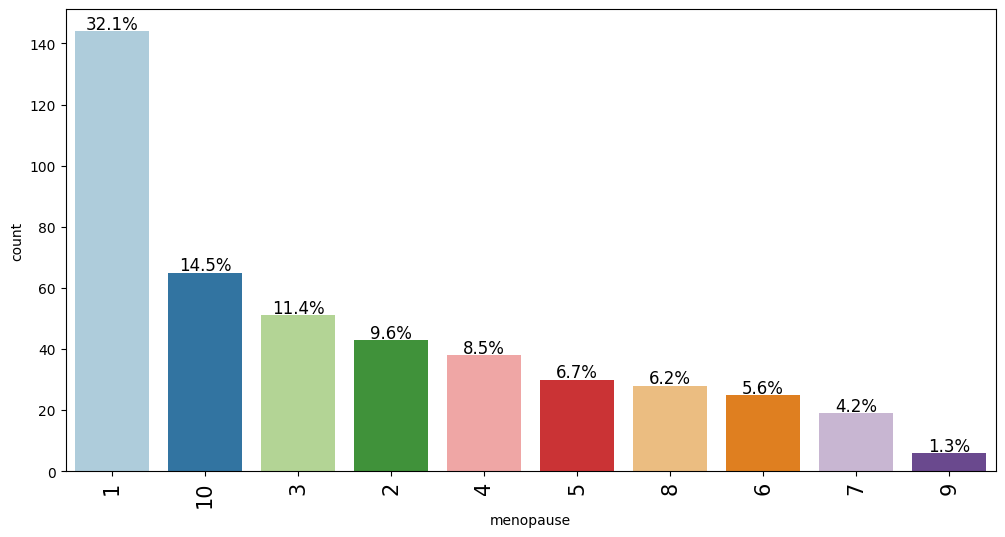

In [24]:
labeled_barplot(cancer, 'menopause', perc=True)

The data shows that the higest number of observation  of the menopause is 1.

### Observations on tumor size:

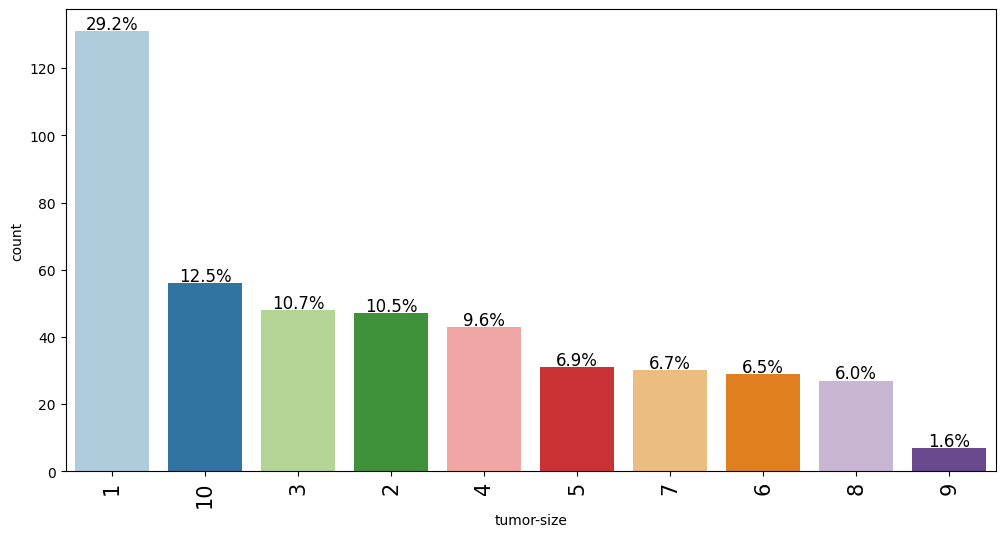

In [25]:
labeled_barplot(cancer, 'tumor-size', perc=True)

The data shows that most of the people have tumor size equal 1.

### Observations on brest:

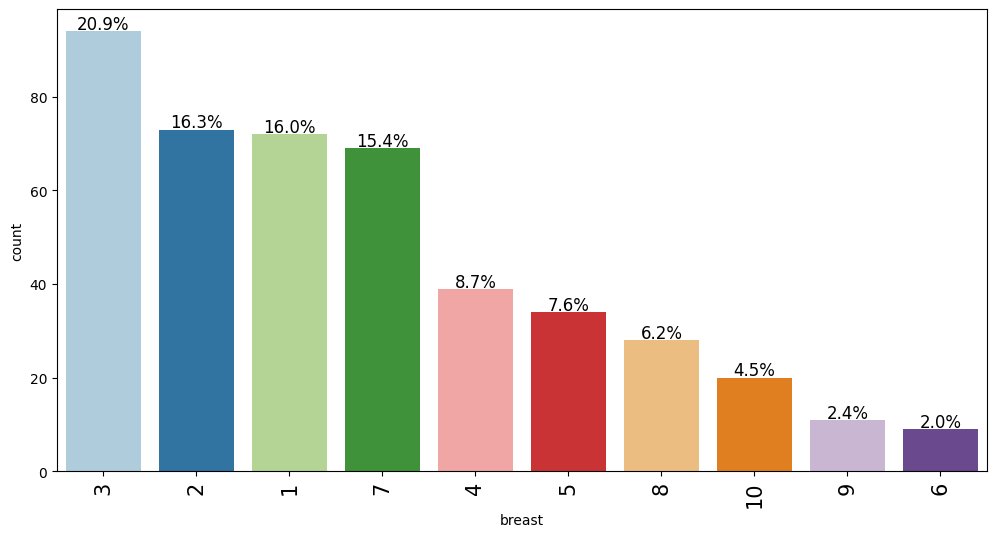

In [26]:
labeled_barplot(cancer, 'breast', perc=True)

### Most of the people have brest value equal 3, followed by 2,1 and 7 respectively.

### Observations on brest quad:

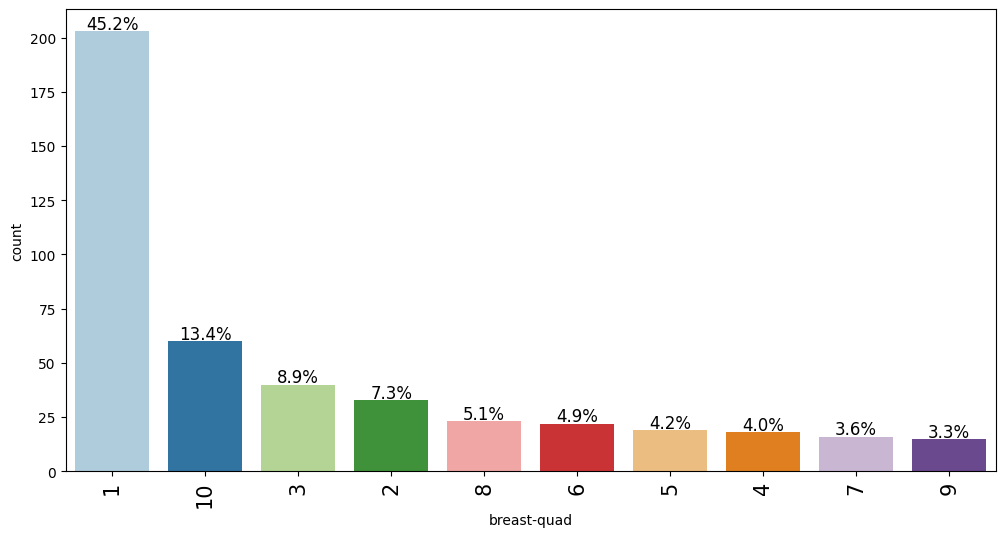

In [27]:
labeled_barplot(cancer, 'breast-quad', perc=True)

### The data shows that the higest value of the brest quad is 1.

### Observations on irradiat :

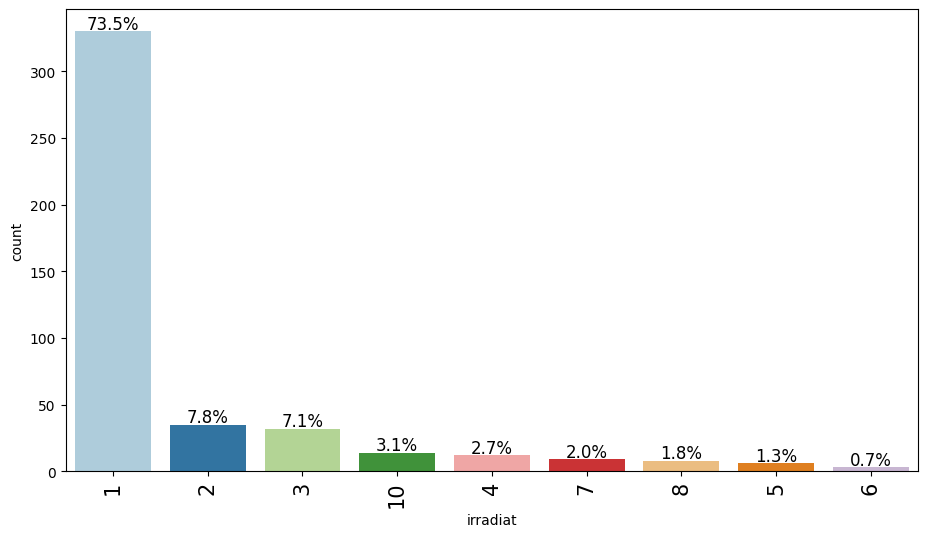

In [28]:
labeled_barplot(cancer, 'irradiat', perc=True)

### The higest value of irradiat is 1.

### Observation on dig malig :

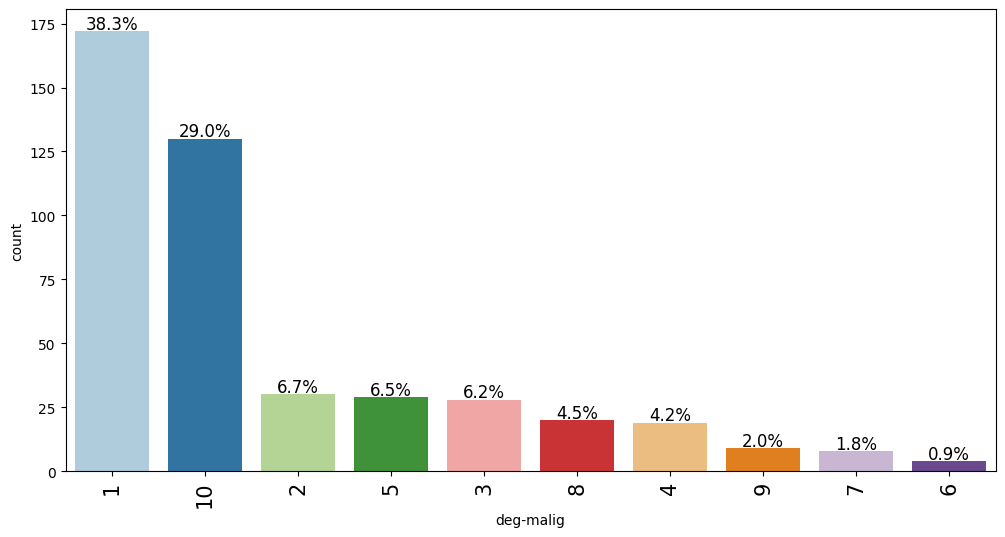

In [29]:
labeled_barplot(cancer, 'deg-malig', perc=True)

### The higest value of deg malig is 1, followed by 10.

### Observations on inv nodes :

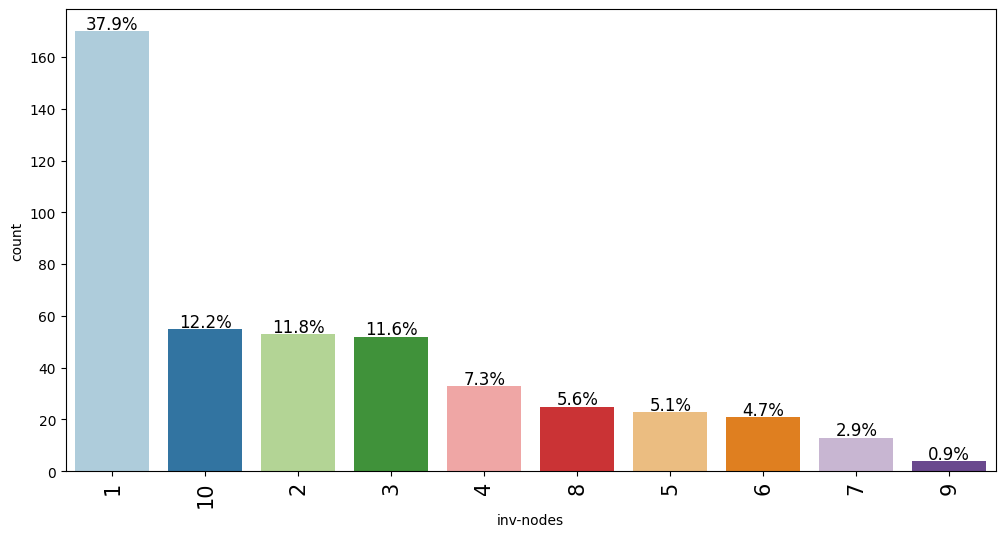

In [30]:
labeled_barplot(cancer, 'inv-nodes', perc=True)

### The higest value of inv node sis also 1.

### Observation on node caps :

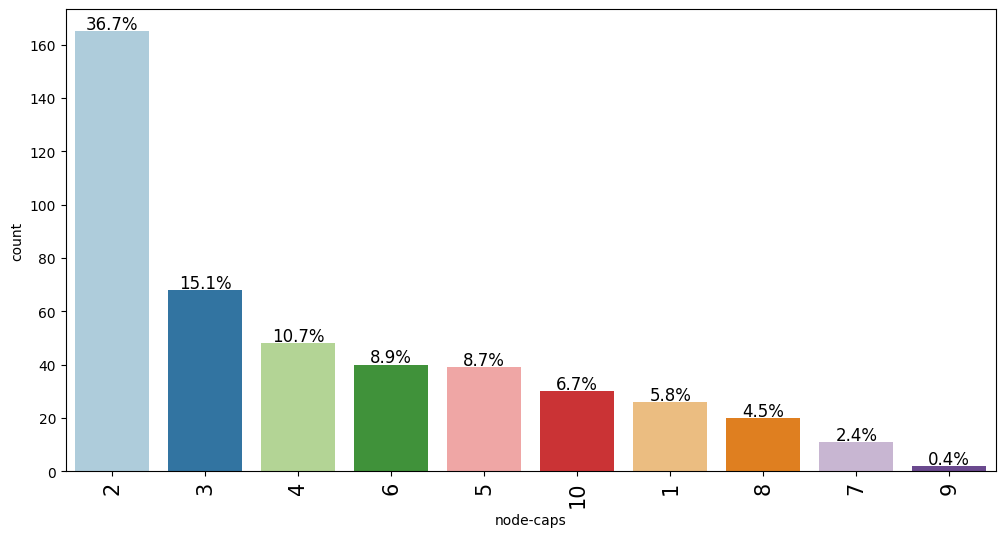

In [31]:
labeled_barplot(cancer, 'node-caps', perc=True)

### The hiogest value of node caps is 2.

## Bivariate analysis:

### Class  vs age :

Class    0    1  All
age                 
All    213  236  449
5       49   45   94
1       48    3   51
3       45   11   56
4       34   12   46
2       20    4   24
6       12   17   29
8        4   40   44
7        1   22   23
9        0   13   13
10       0   69   69
------------------------------------------------------------------------------------------------------------------------


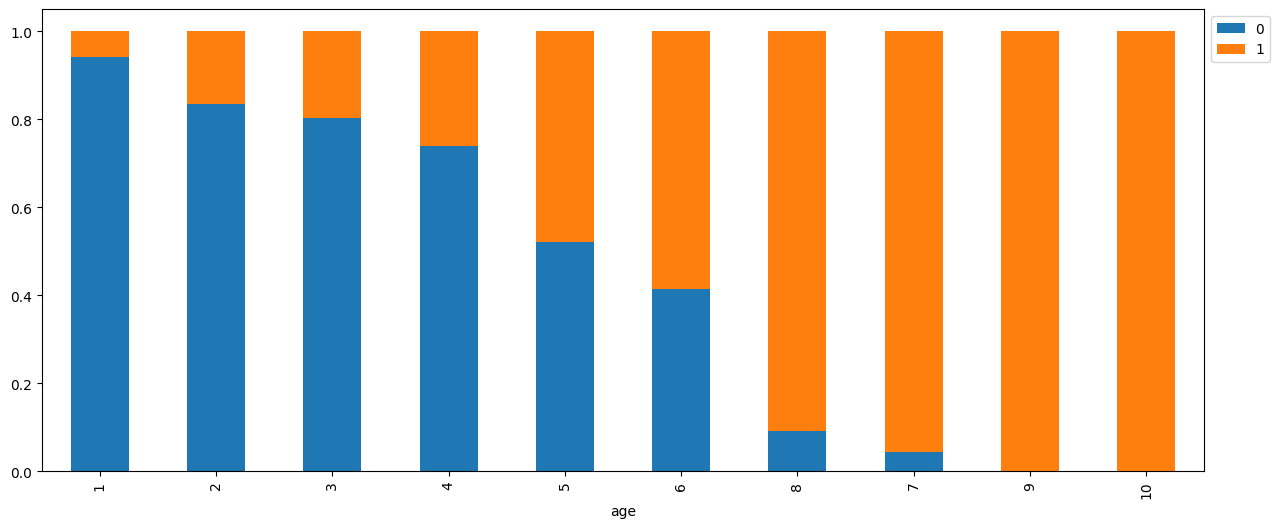

In [32]:
stacked_barplot(cancer, 'age', 'Class')

## Observations :
We noticed that all the people in age 10 and 9 have cancer (class 1), followed by 7 then 8 then 6.

### Class vs tumor size :

Class         0    1  All
tumor-size               
All         213  236  449
1           129    2  131
2            40    7   47
3            25   23   48
4            12   31   43
5             2   29   31
6             2   27   29
7             2   28   30
8             1   26   27
9             0    7    7
10            0   56   56
------------------------------------------------------------------------------------------------------------------------


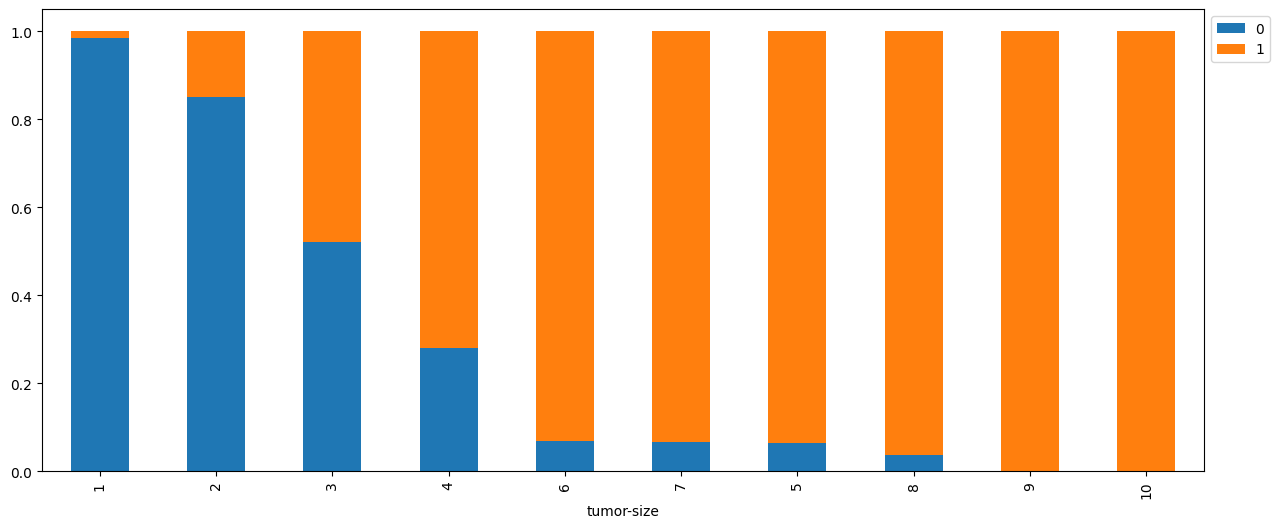

In [33]:
stacked_barplot(cancer, 'tumor-size', 'Class')

## Observations :
All size 9 and 10 has cancerr (class 1), followed by 8, then 5,7,6.

### Class vs menopause :

Class        0    1  All
menopause               
All        213  236  449
1          140    4  144
2           35    8   43
3           27   24   51
4            8   30   38
7            1   18   19
8            1   27   28
9            1    5    6
5            0   30   30
6            0   25   25
10           0   65   65
------------------------------------------------------------------------------------------------------------------------


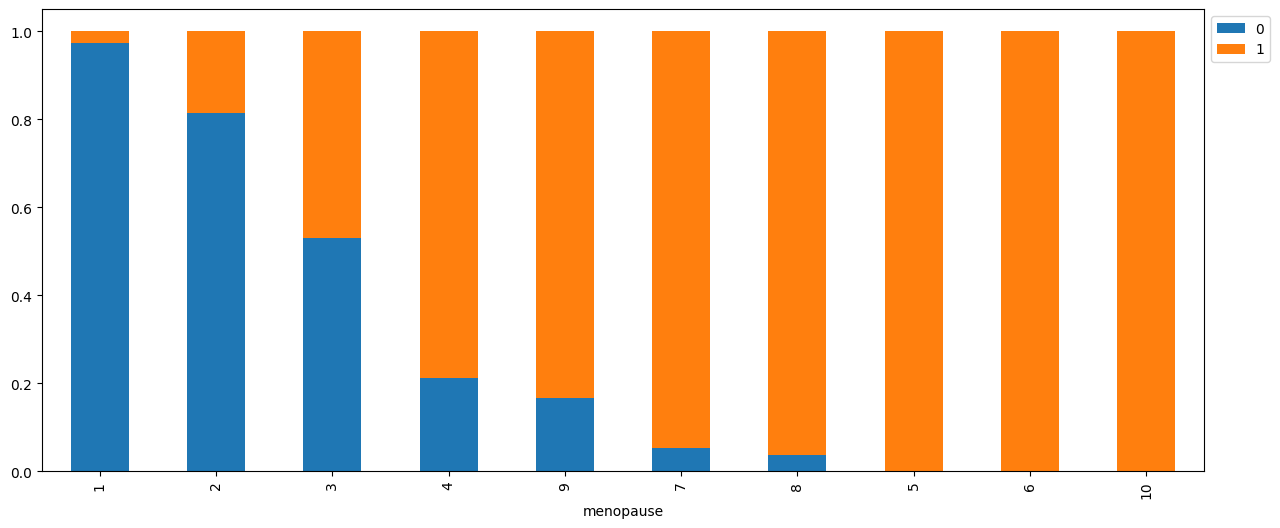

In [34]:
stacked_barplot(cancer, 'menopause', 'Class')

## Observations :
The people who have menopause equal 10,6 and 5 all have cancer (class 1), followed by 8,7,9 respectively.

### Class vs breast:

Class     0    1  All
breast               
All     213  236  449
1        70    2   72
2        66    7   73
3        59   35   94
4         7   32   39
7         6   63   69
5         4   30   34
6         1    8    9
8         0   28   28
9         0   11   11
10        0   20   20
------------------------------------------------------------------------------------------------------------------------


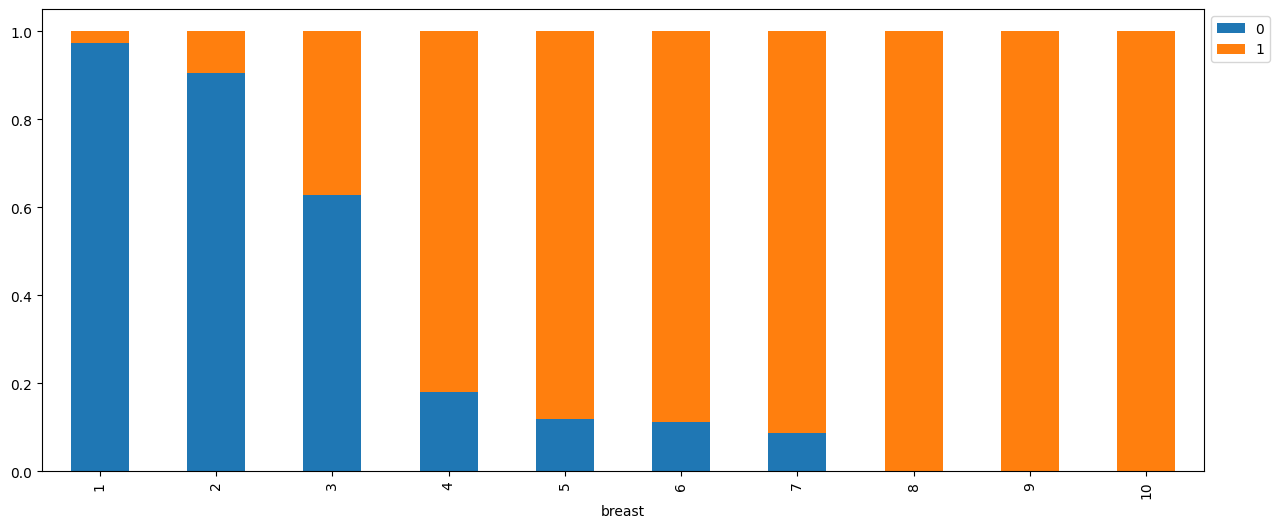

In [35]:
stacked_barplot(cancer, 'breast', 'Class')

## Observations :
The brest values 10 ,9 and 8 all have class 1.

### Class vs breast quad:

Class          0    1  All
breast-quad               
All          213  236  449
1            163   40  203
2             27    6   33
3             11   29   40
6              4   18   22
8              3   20   23
5              2   17   19
7              2   14   16
4              1   17   18
9              0   15   15
10             0   60   60
------------------------------------------------------------------------------------------------------------------------


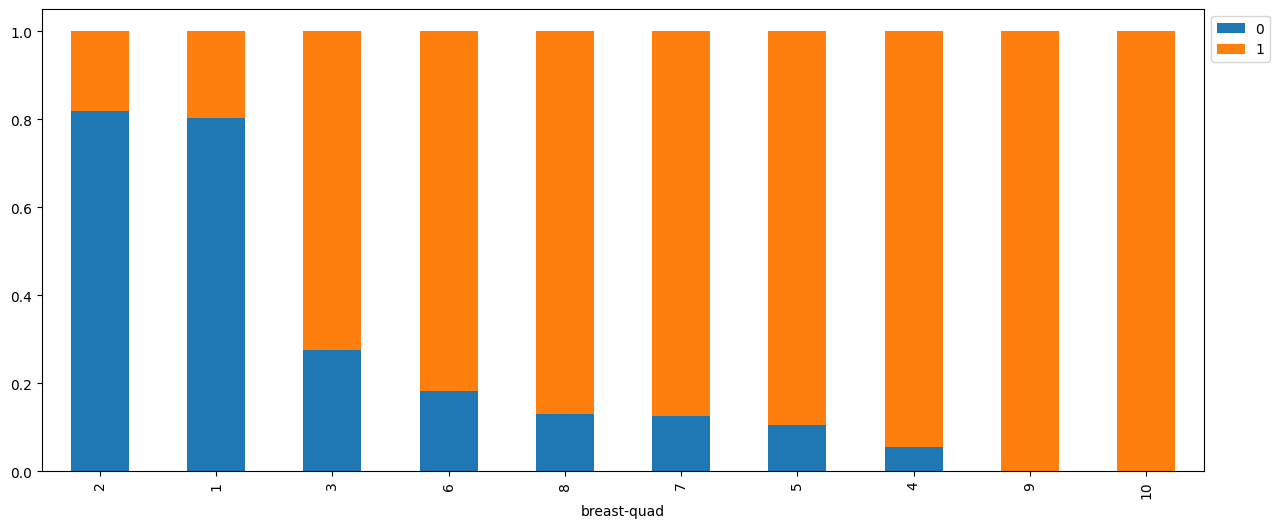

In [36]:
stacked_barplot(cancer, 'breast-quad', 'Class')

## Observations :
Breast quad values 10 and 9 have class 1, followed 4 then 5.

### Class  vs irradiat:

Class       0    1  All
irradiat               
All       213  236  449
1         200  130  330
2           8   27   35
3           2   30   32
5           1    5    6
7           1    8    9
8           1    7    8
4           0   12   12
6           0    3    3
10          0   14   14
------------------------------------------------------------------------------------------------------------------------


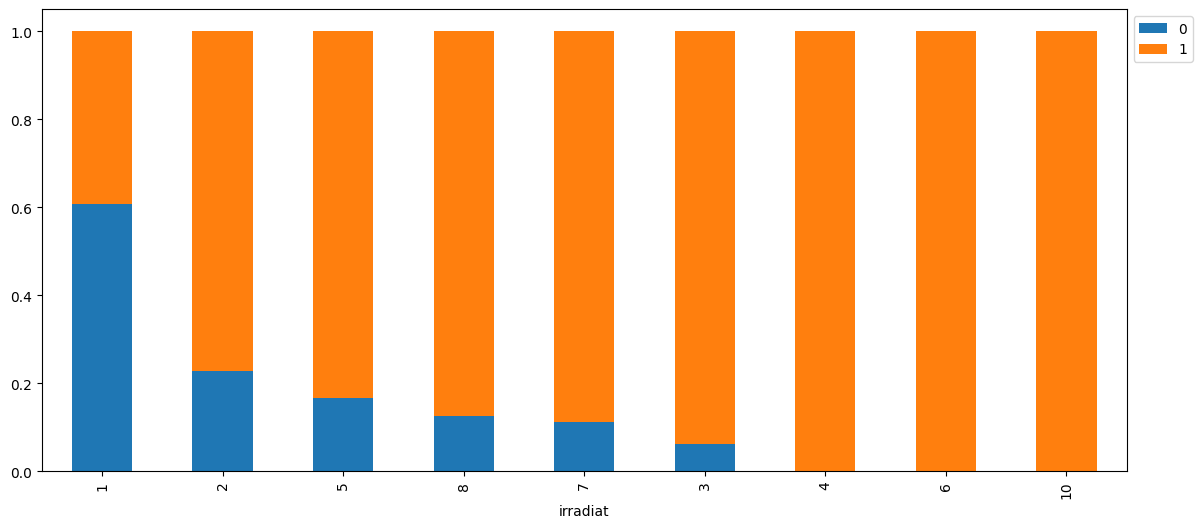

In [37]:
stacked_barplot(cancer, 'irradiat', 'Class')

## Observations :
The irradiat values 10,6 and 4 all have class 1.

### Class vs deg malig:

Class        0    1  All
deg-malig               
All        213  236  449
1          157   15  172
2           21    9   30
3           14   14   28
5            9   20   29
4            6   13   19
10           3  127  130
8            2   18   20
7            1    7    8
6            0    4    4
9            0    9    9
------------------------------------------------------------------------------------------------------------------------


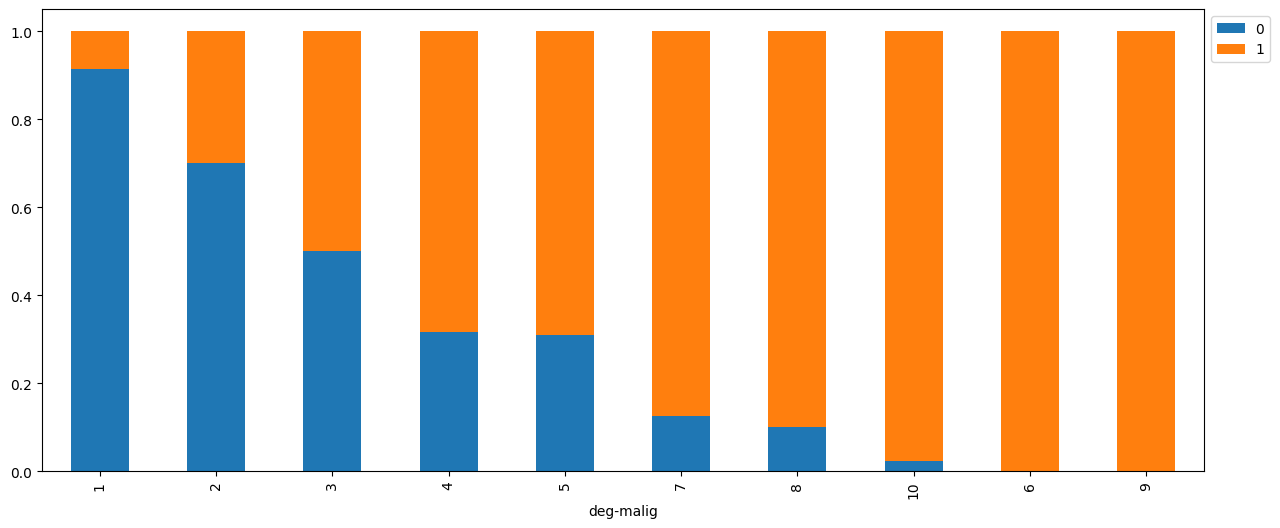

In [38]:
stacked_barplot(cancer, 'deg-malig', 'Class')

## Observations :
The deg malig values 9 and 6 have class 1, followed by 10.

### Class vs inv nodes:

Class        0    1  All
inv-nodes               
All        213  236  449
1          141   29  170
2           34   19   53
3           25   27   52
4            5   28   33
5            4   19   23
6            3   18   21
10           1   54   55
7            0   13   13
8            0   25   25
9            0    4    4
------------------------------------------------------------------------------------------------------------------------


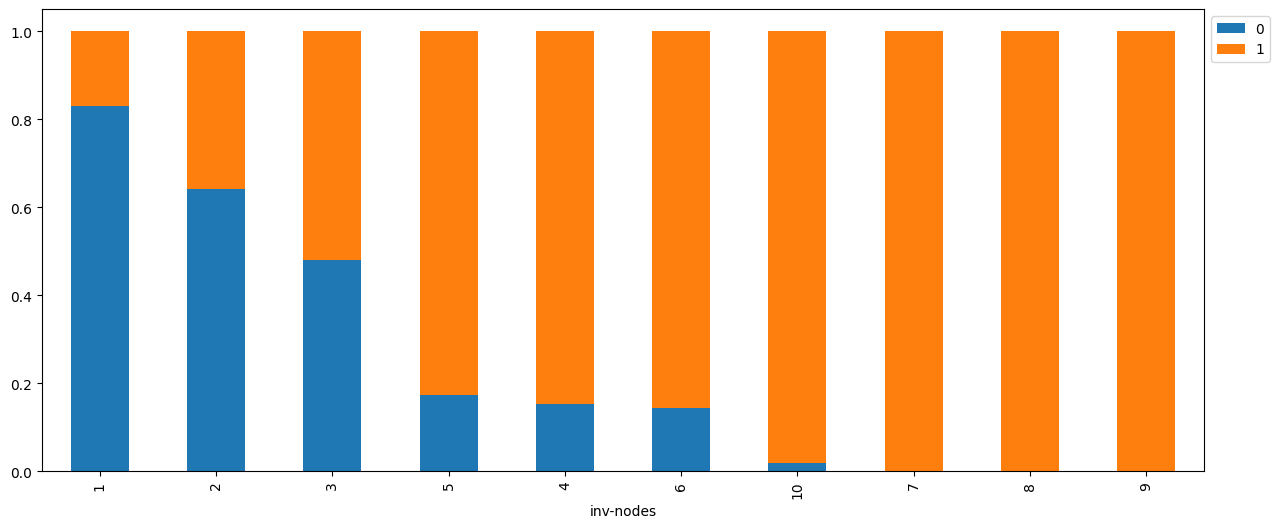

In [39]:
stacked_barplot(cancer, 'inv-nodes', 'Class')

## Observations:
The inv nodes value 9,8 and 7 have class 1.

### Class vs node caps:

Class        0    1  All
node-caps               
All        213  236  449
2          144   21  165
3           26   42   68
1           25    1   26
4            7   41   48
5            5   34   39
7            2    9   11
8            2   18   20
6            1   39   40
10           1   29   30
9            0    2    2
------------------------------------------------------------------------------------------------------------------------


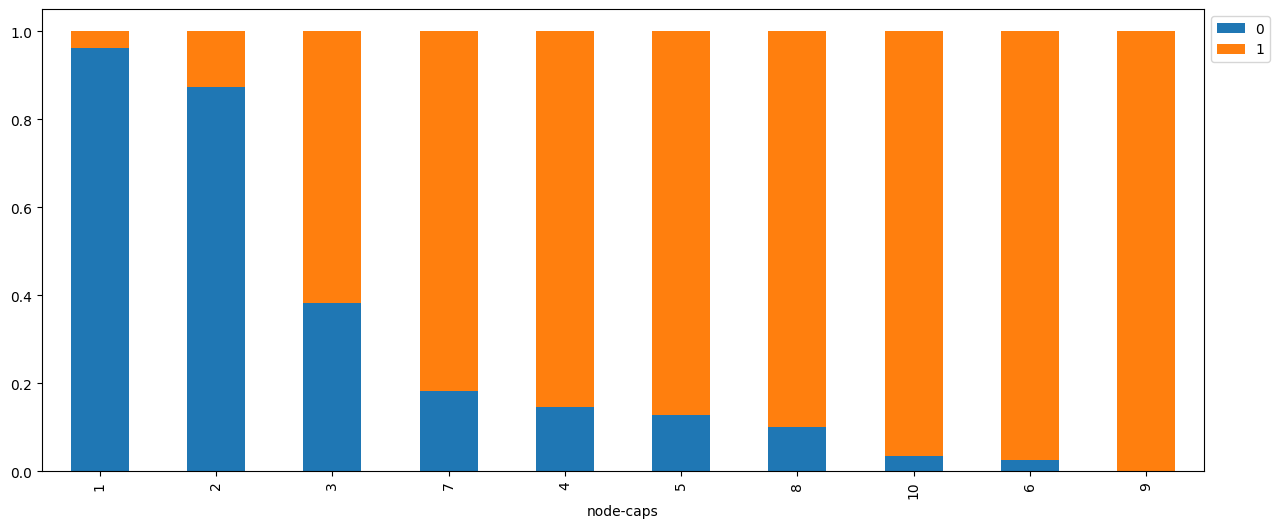

In [40]:
stacked_barplot(cancer, 'node-caps', 'Class')

## Observations:
Node caps value 9 have class 1 followed by 6 then 10.

## Data Processing:

### Data parapration for modeling:

In [41]:
x=cancer.drop('Class',axis=1)
y=cancer['Class']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [43]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 269
Number of rows in test data = 180


In [44]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Class
1    0.557621
0    0.442379
Name: proportion, dtype: float64
Percentage of classes in test set:
Class
0    0.522222
1    0.477778
Name: proportion, dtype: float64


#Model building :
if the person has a cancer and the model predictd that he has no cancer this is a problem, because i will gonna ignore his problem by considring that he is well.
if the person has no cancer and the model pridected that he has cancer this is a problem too, because i will gonna give him further checks.
## which one is important?
case 1 is more important, because this might cause that that person lose his life because the wrong prediction, so i need to increase the precision, to minimize the false positive.


### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.


In [45]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [48]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [47]:
model0 = DecisionTreeClassifier(criterion="gini", random_state=1)
model0.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

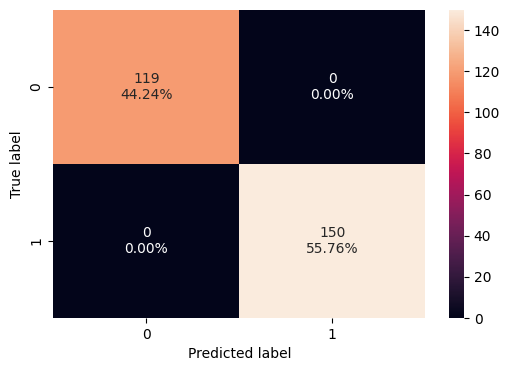

In [49]:
confusion_matrix_sklearn(model0, x_train, y_train)

In [100]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, x_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### lets check the performance for the test as well:

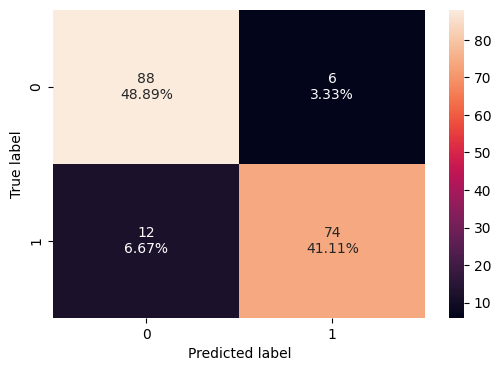

In [52]:
confusion_matrix_sklearn(model0, x_test, y_test)

In [92]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, x_test, y_test
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,0.9,0.860465,0.925,0.891566


### we noticede that the model doing well generally, but in training more than testing .

### lets visualizing the tree:

In [55]:
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']


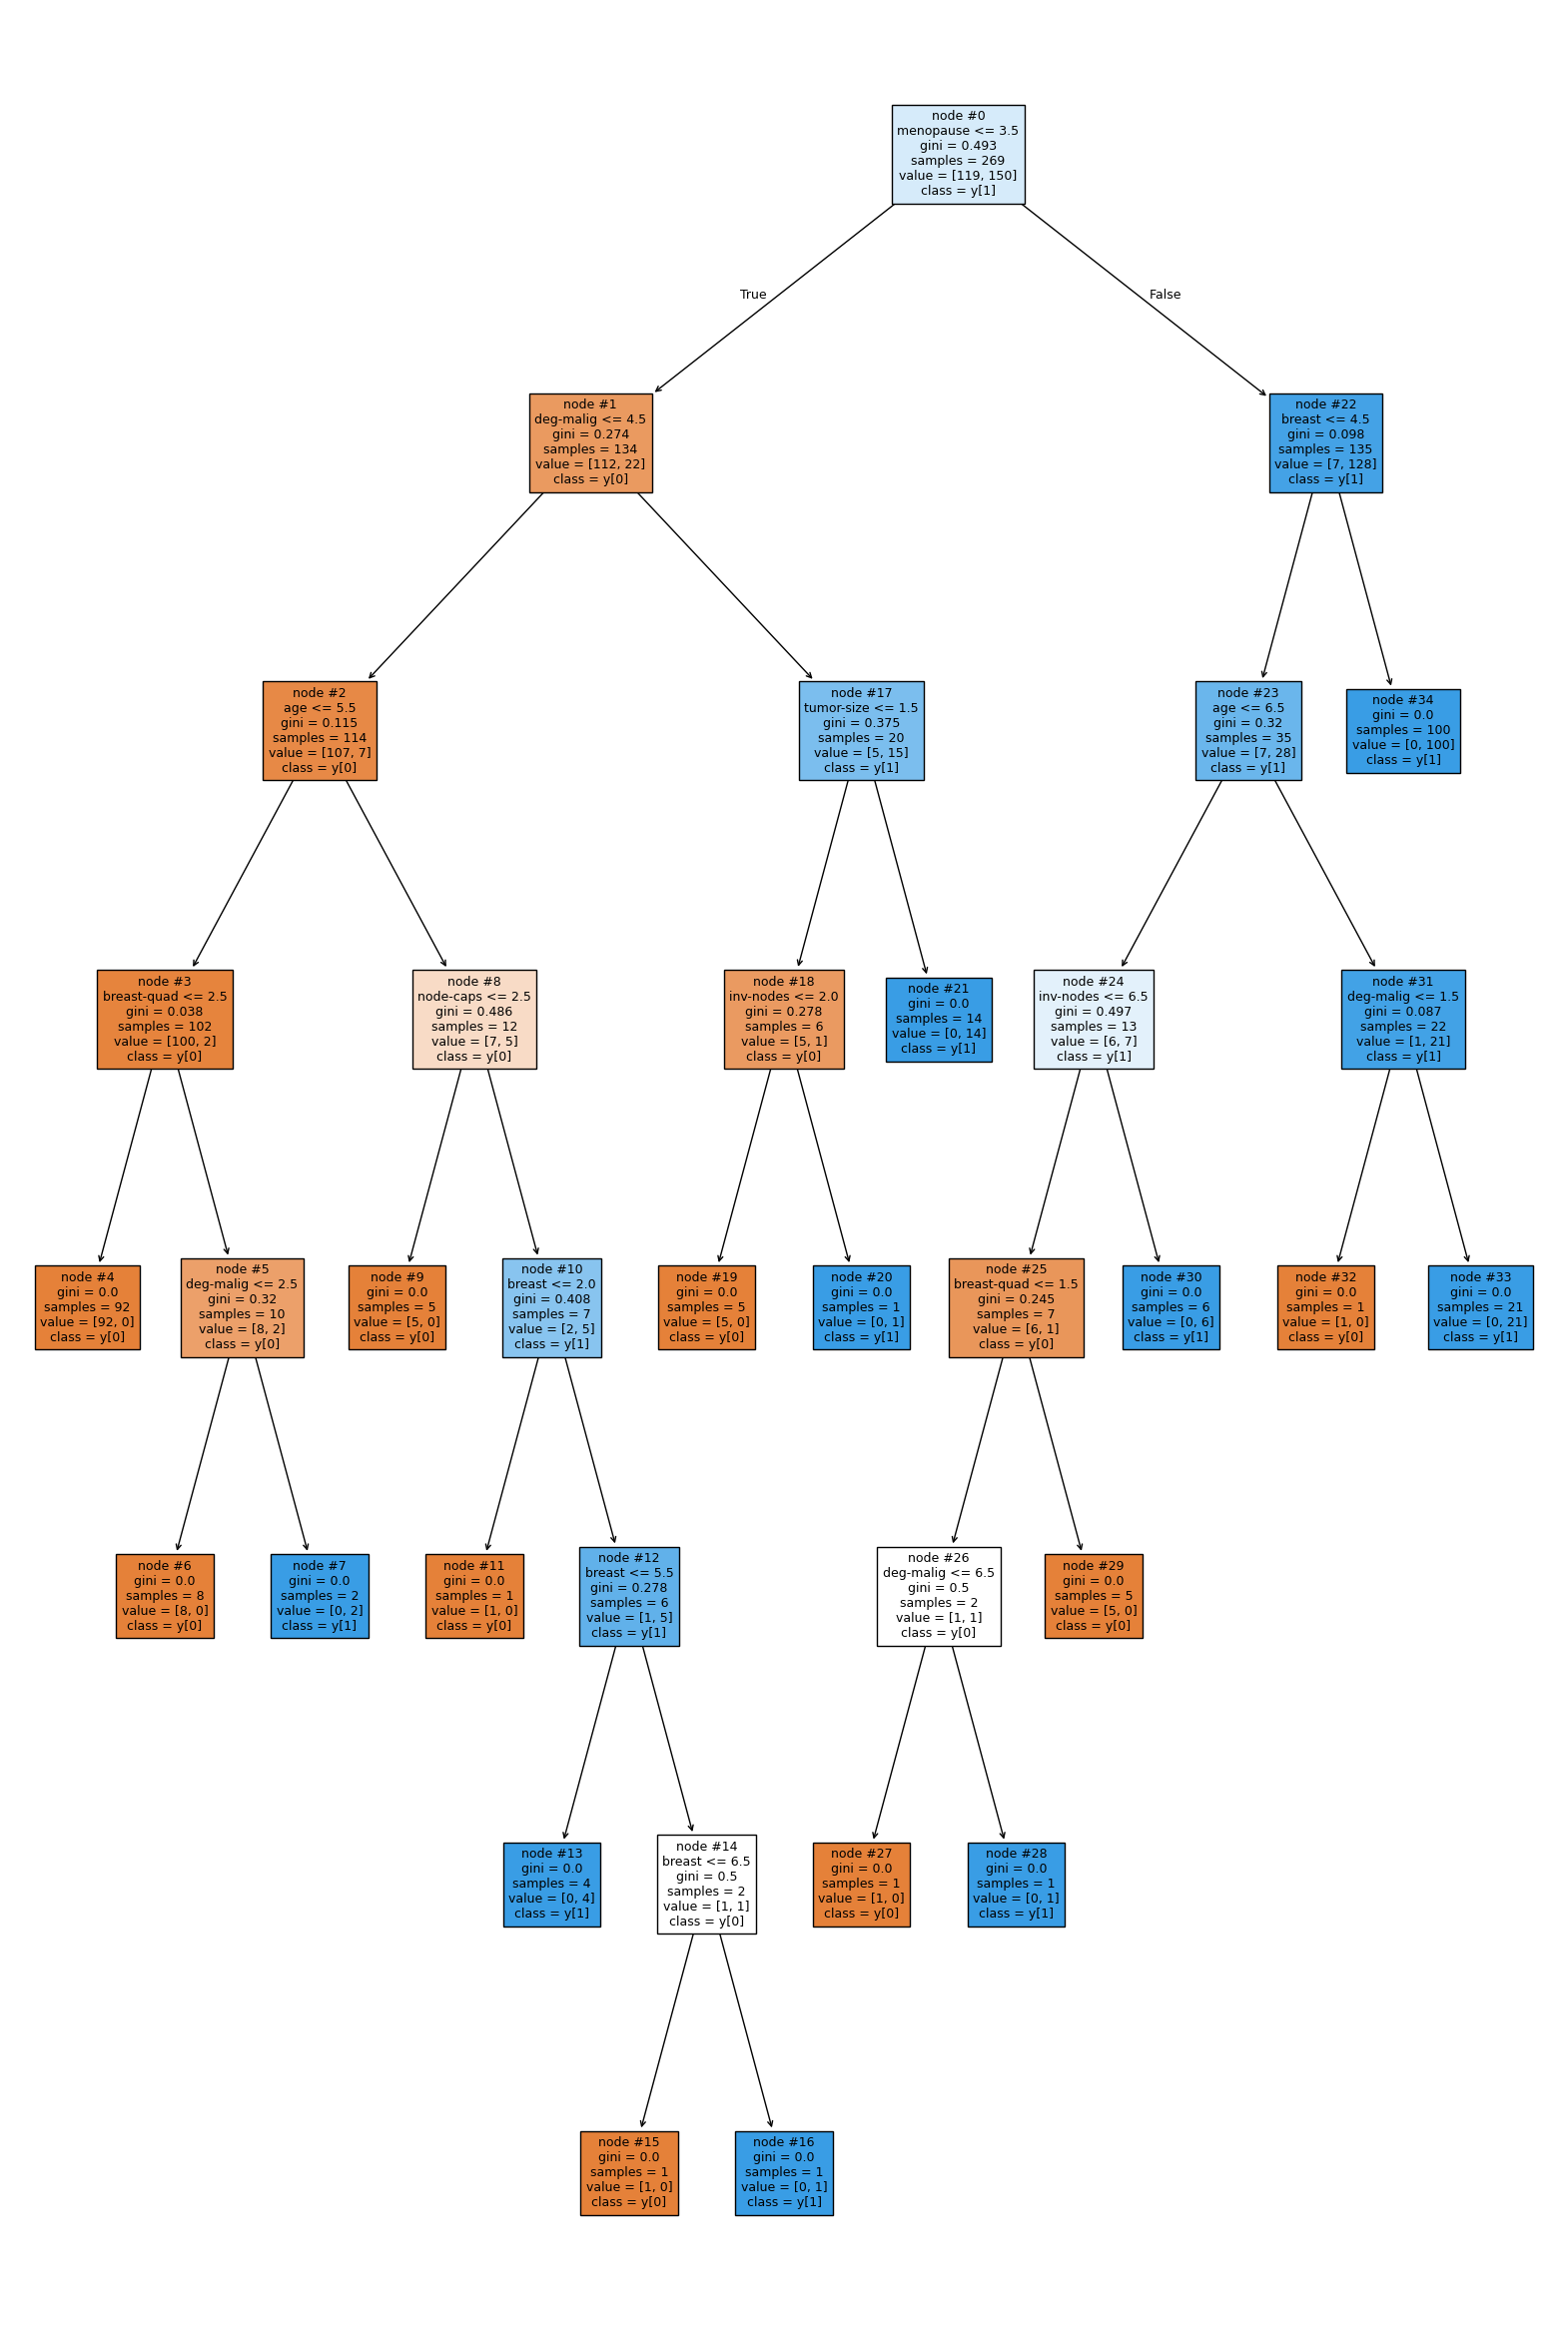

In [56]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [57]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- menopause <= 3.50
|   |--- deg-malig <= 4.50
|   |   |--- age <= 5.50
|   |   |   |--- breast-quad <= 2.50
|   |   |   |   |--- weights: [92.00, 0.00] class: 0
|   |   |   |--- breast-quad >  2.50
|   |   |   |   |--- deg-malig <= 2.50
|   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |--- deg-malig >  2.50
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |--- age >  5.50
|   |   |   |--- node-caps <= 2.50
|   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |--- node-caps >  2.50
|   |   |   |   |--- breast <= 2.00
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- breast >  2.00
|   |   |   |   |   |--- breast <= 5.50
|   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |--- breast >  5.50
|   |   |   |   |   |   |--- breast <= 6.50
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- breast >  6.50
|   |   |   |   |   |   |   |--- weights:

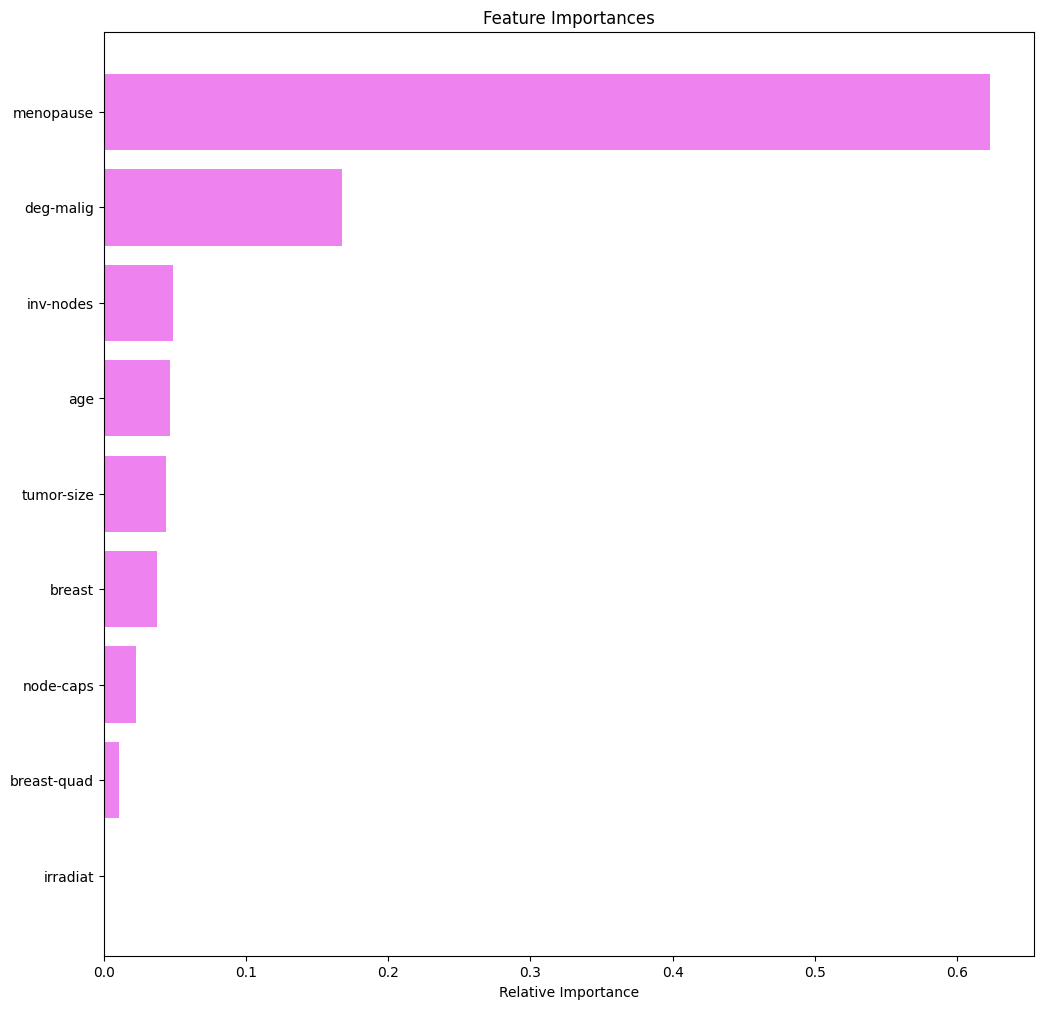

In [58]:
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


### W e can noticr that the menopause is the most important parameter.

#Pre pruning:


* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).

In [59]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(x_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(x_train)
            y_test_pred = estimator.predict(x_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# creating an instance of the best model
model1 = best_estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 0.9651162790697675


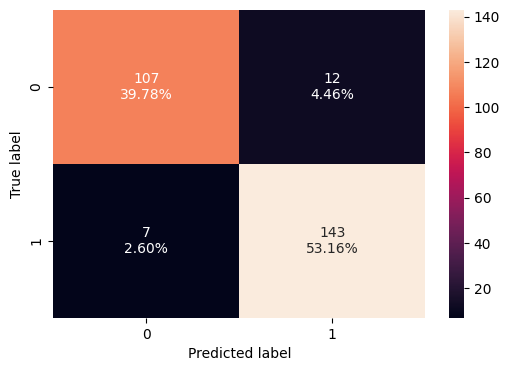

In [61]:
confusion_matrix_sklearn(model1, x_train, y_train)

In [63]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model1, x_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.929368,0.953333,0.922581,0.937705


### Lets check for the test:

In [65]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model1, x_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.938889,0.965116,0.912088,0.937853


We can notice that the performance for precision allmost the same.

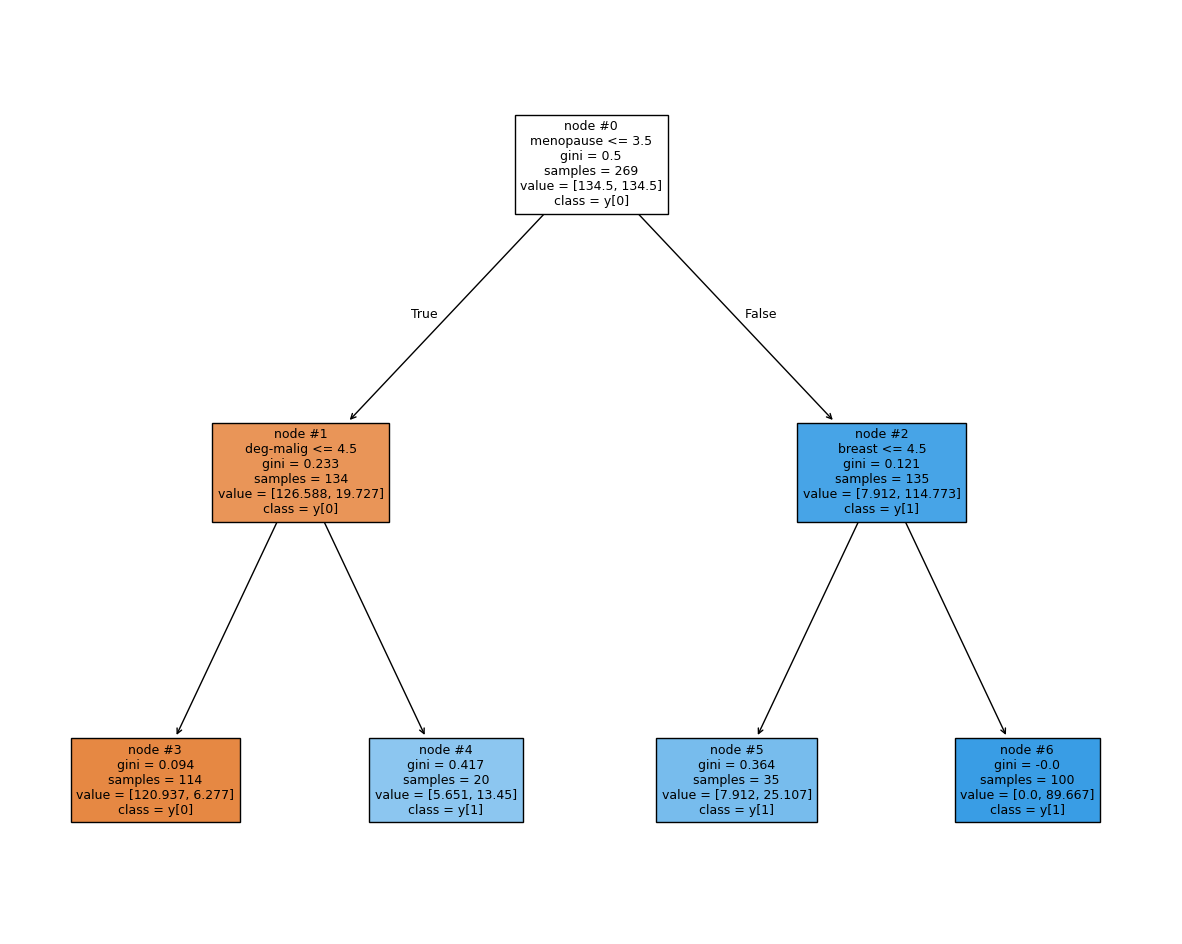

In [66]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

But the depth of the tree only 2, and easy to read and translate the tree.

In [68]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- menopause <= 3.50
|   |--- deg-malig <= 4.50
|   |   |--- weights: [120.94, 6.28] class: 0
|   |--- deg-malig >  4.50
|   |   |--- weights: [5.65, 13.45] class: 1
|--- menopause >  3.50
|   |--- breast <= 4.50
|   |   |--- weights: [7.91, 25.11] class: 1
|   |--- breast >  4.50
|   |   |--- weights: [0.00, 89.67] class: 1



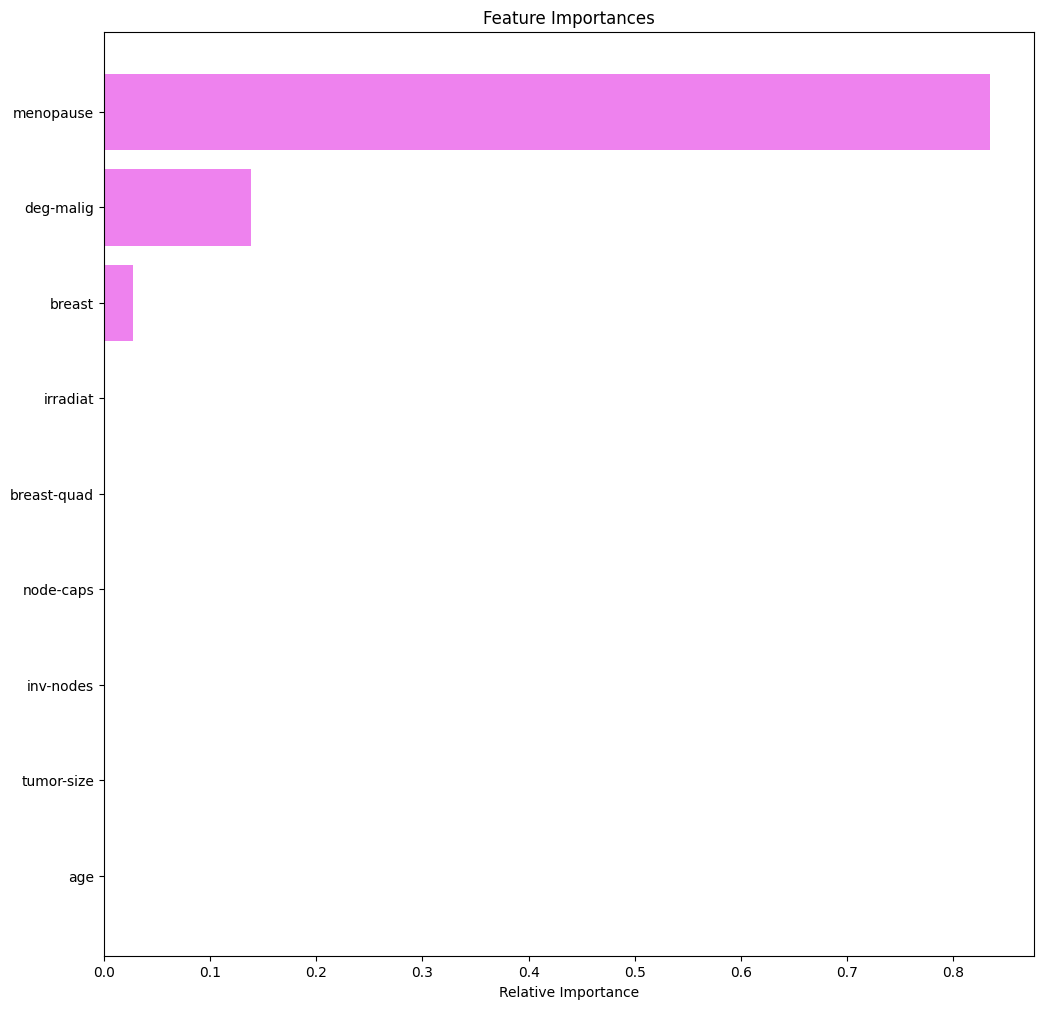

In [69]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Post  purning

* Cost complexity pruning provides another option to control the size of a tree.
* In DecisionTreeClassifier, this pruning technique is parameterized by the
cost complexity parameter, ccp_alpha.

* Greater values of ccp_alpha increase the number of nodes pruned.
* Here we only show the effect of ccp_alpha on regularizing the trees and how to choose the optimal ccp_alpha value.

In [71]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [72]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.003098,0.006196
2,0.003186,0.012569
3,0.004426,0.016994
4,0.006196,0.023190
5,0.007097,0.030287
6,0.007289,0.044865
7,0.011064,0.055929
8,0.011959,0.091805
9,0.012585,0.104391


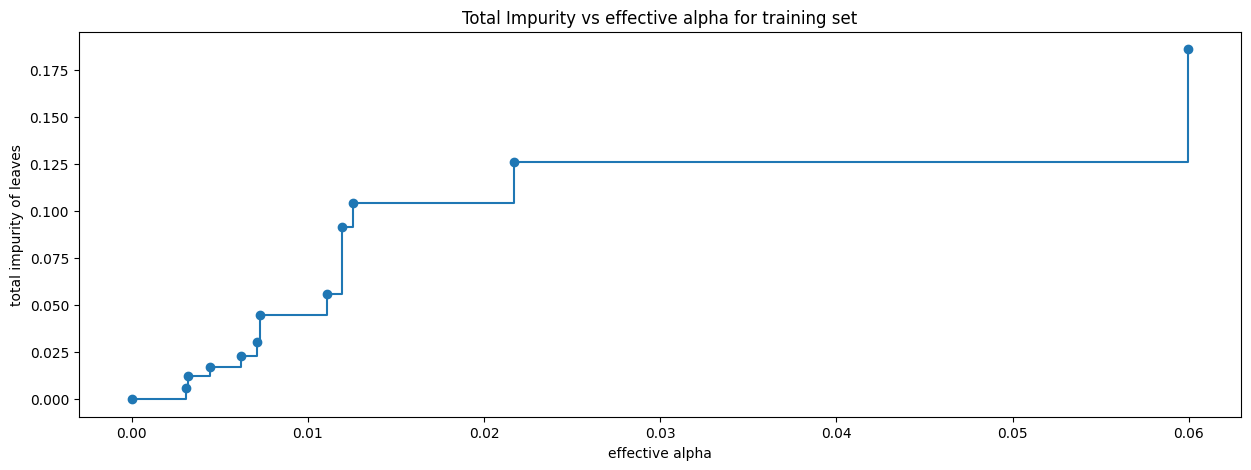

In [73]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [75]:

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3072994839025317


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

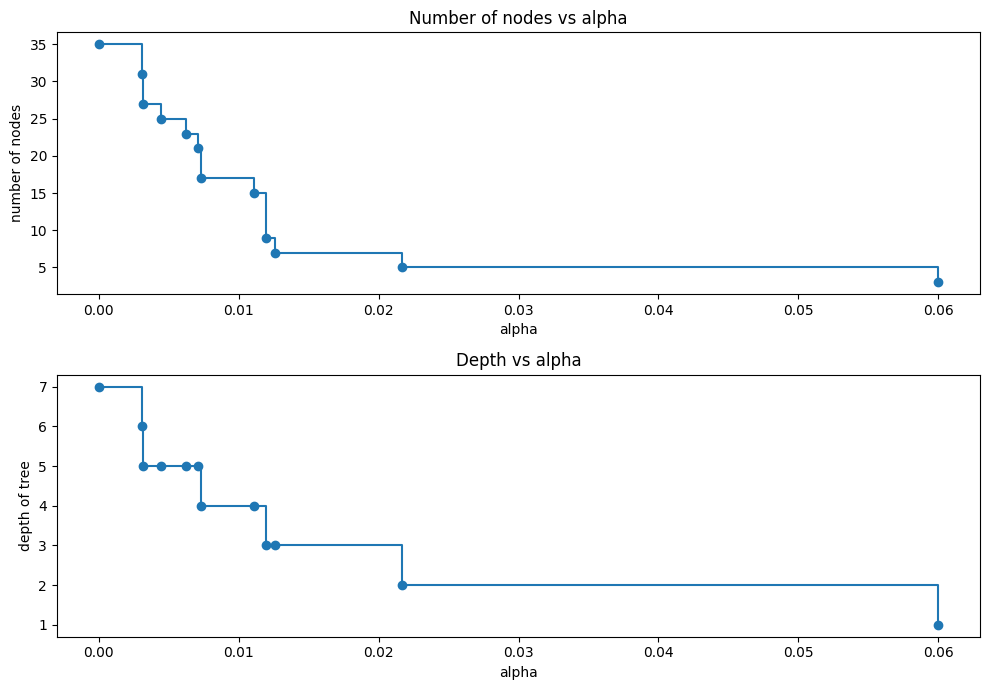

In [76]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Precision vs alpha for training and testing sets

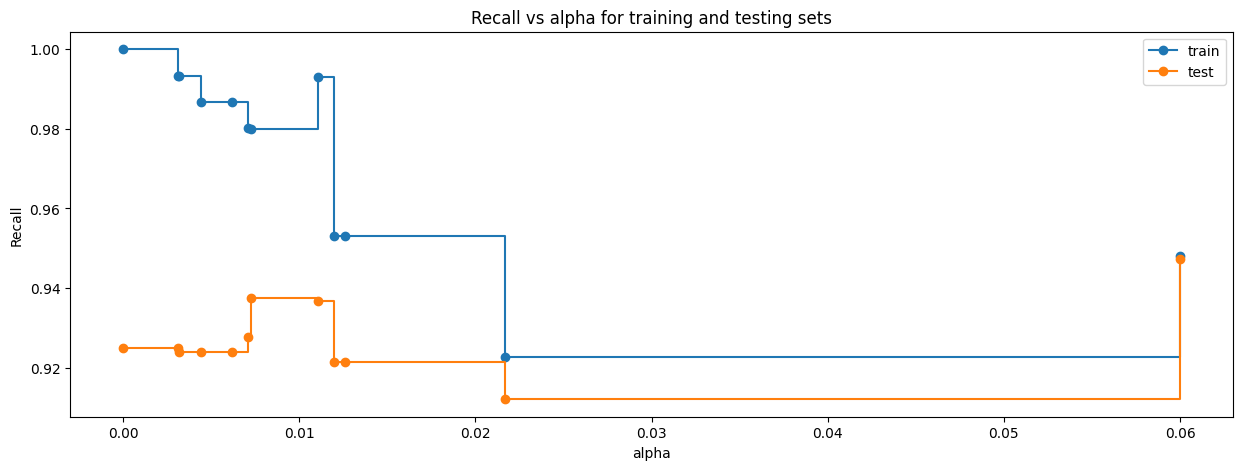

In [78]:
prec_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = precision_score(y_train, pred_train)
    prec_train.append(values_train)
prec_test = []

for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = precision_score(y_test, pred_test)
    prec_test.append(values_test)

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, prec_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, prec_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [80]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(prec_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.05998426961260997, random_state=1)


## check the performances:

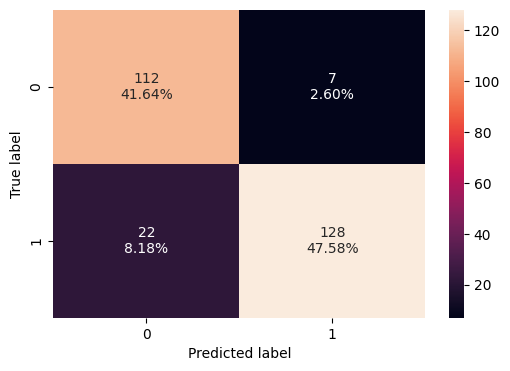

In [82]:
model3 = best_model
confusion_matrix_sklearn(model3, x_train, y_train)

In [84]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    model3, x_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.892193,0.853333,0.948148,0.898246


for testing:

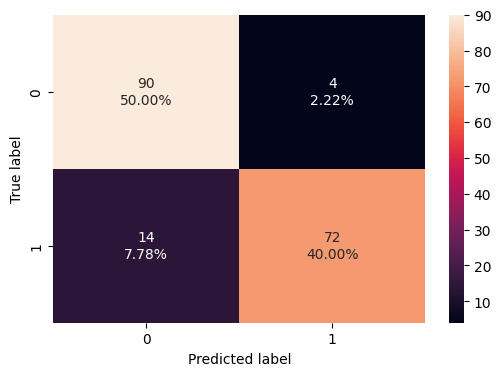

In [87]:
confusion_matrix_sklearn(model3, x_test, y_test)

In [86]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    model3, x_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.9,0.837209,0.947368,0.888889


### We noticed that post pruning imporove thr precision further.

### lets visualize the tree:

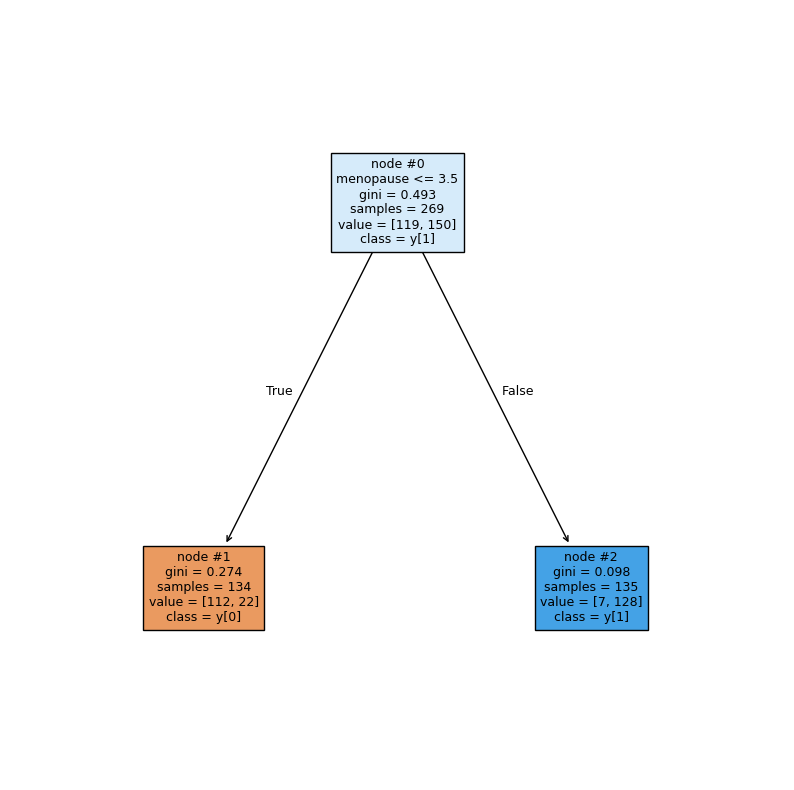

In [88]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

Only one depth.

In [89]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model3, feature_names=feature_names, show_weights=True))

|--- menopause <= 3.50
|   |--- weights: [112.00, 22.00] class: 0
|--- menopause >  3.50
|   |--- weights: [7.00, 128.00] class: 1



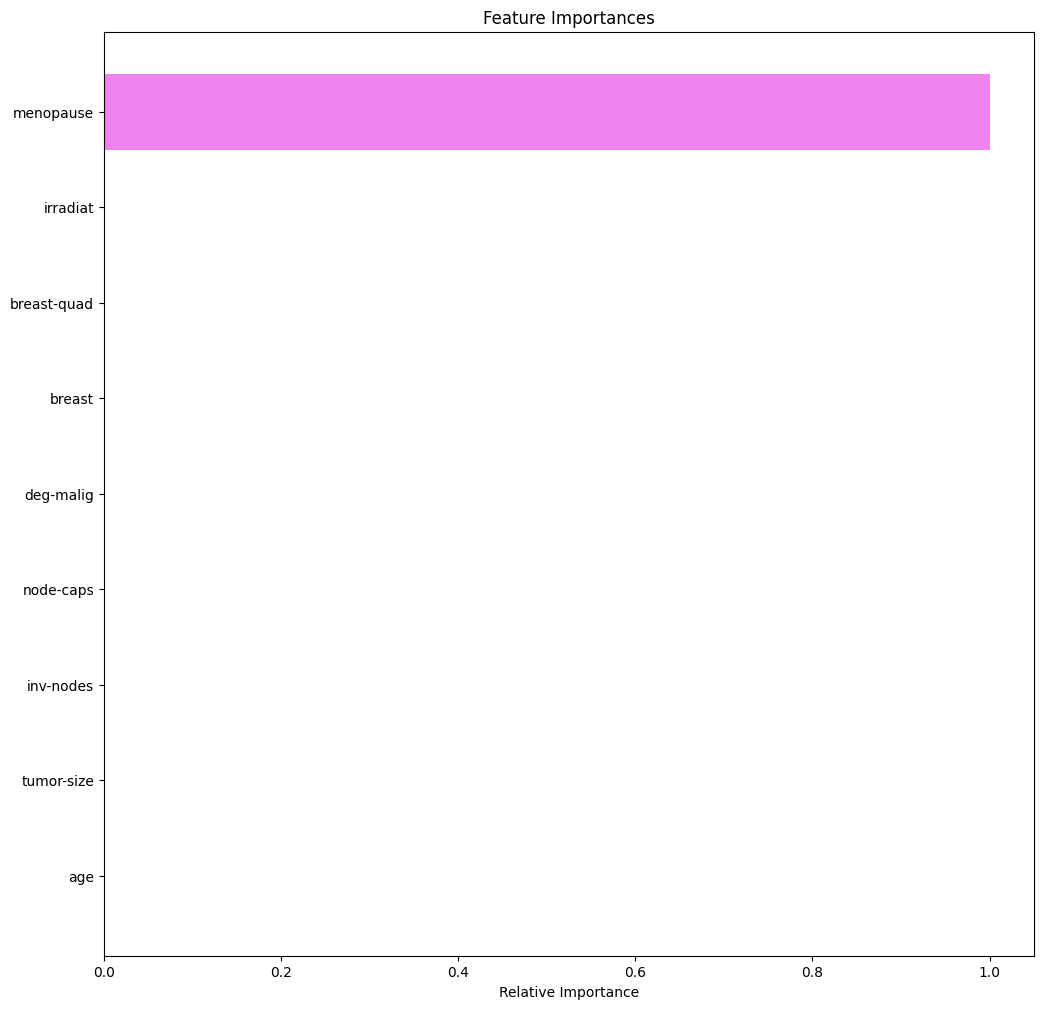

In [90]:
importances = model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### We can notice that the only feature that affect the performance is menopause.

#* Model Performance Comparison and Final Model Selection


In [101]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df



Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.929368,0.892193
Recall,1.0,0.953333,0.853333
Precision,1.0,0.922581,0.948148
F1,1.0,0.937705,0.898246


In [98]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.900000,0.938889,0.900000
Recall,0.860465,0.965116,0.837209
Precision,0.925000,0.912088,0.947368
F1,0.891566,0.937853,0.888889


### We can notice that the post prunung doing well in both training and testing and made the tree easier ti understand.

# Conclusion and Recommendations:

*  The menopause is the most important feature in the data set.
* We focused on the precision because it is most important.
* Defalut model have precision equal to 1 but makes the system very complicated.
* both post and pre pruning makes tree easier and simple, by pruning the nodes.
* We suggest to use post pruning because it makes the system generlize well and better, and make the tree easy as well.